In [61]:
import csv

import numpy as np
from matplotlib import pyplot as plt

In [62]:
# Dataset function
def dataset_func(n_samples, x_length, func):
    x = x_length * np.arange(n_samples) / n_samples
    if func == "square":
        y = x * x
    else:
        y = func(x)
    return x, y


# Function to save data to CSV
def save_to_csv(n_samples, x_length, func):
    x, y = dataset_func(n_samples, x_length, func)
    filename = f"dataset_{n_samples}_samples_{func}.csv"

    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['x', 'y'])  # Writing header
        for xi, yi in zip(x, y):
            writer.writerow([xi, yi])

    print(f"Data saved to {filename}")

Data saved to dataset_500_samples_<ufunc 'sin'>.csv


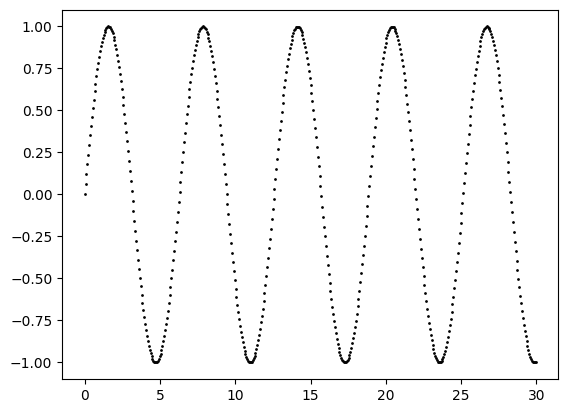

In [66]:
scale = 30
n_datapoints = 500
func = np.sin

x, y = dataset_func(n_samples=n_datapoints, x_length=scale, func=func)
save_to_csv(n_datapoints, scale, func)

plt.scatter(x, y, s=1, edgecolor='black', facecolor='white', alpha=1, label='Data Samples')

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim

In [55]:
# Data arrays, convert them to PyTorch tensors
x_tensor = torch.Tensor(x)  # Replace x with your data
y_tensor = torch.Tensor(y)  # Replace y with your data


# Define the Neural Network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(in_features=x_tensor.shape[0],
                             out_features=128)  # Adjust input features to match your data
        self.fc2 = nn.Linear(in_features=128, out_features=64)
        self.fc3 = nn.Linear(in_features=64,
                             out_features=y_tensor.shape[0])  # Adjust output features to match your data

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Initialize the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.MSELoss()  # Assuming a regression problem; use CrossEntropyLoss for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
for epoch in range(100):  # Number of epochs
    # Forward pass
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch + 1}/100], Loss: {loss.item():.4f}')

Epoch [1/100], Loss: 3.0691
Epoch [2/100], Loss: 0.9026
Epoch [3/100], Loss: 0.7064
Epoch [4/100], Loss: 0.6641
Epoch [5/100], Loss: 0.5799
Epoch [6/100], Loss: 0.5286
Epoch [7/100], Loss: 0.5219
Epoch [8/100], Loss: 0.5151
Epoch [9/100], Loss: 0.5049
Epoch [10/100], Loss: 0.4926
Epoch [11/100], Loss: 0.4755
Epoch [12/100], Loss: 0.4550
Epoch [13/100], Loss: 0.4356
Epoch [14/100], Loss: 0.4230
Epoch [15/100], Loss: 0.4160
Epoch [16/100], Loss: 0.4105
Epoch [17/100], Loss: 0.4023
Epoch [18/100], Loss: 0.3894
Epoch [19/100], Loss: 0.3734
Epoch [20/100], Loss: 0.3557
Epoch [21/100], Loss: 0.3381
Epoch [22/100], Loss: 0.3217
Epoch [23/100], Loss: 0.3073
Epoch [24/100], Loss: 0.2935
Epoch [25/100], Loss: 0.2792
Epoch [26/100], Loss: 0.2654
Epoch [27/100], Loss: 0.2525
Epoch [28/100], Loss: 0.2400
Epoch [29/100], Loss: 0.2272
Epoch [30/100], Loss: 0.2141
Epoch [31/100], Loss: 0.2010
Epoch [32/100], Loss: 0.1880
Epoch [33/100], Loss: 0.1748
Epoch [34/100], Loss: 0.1619
Epoch [35/100], Loss: 0

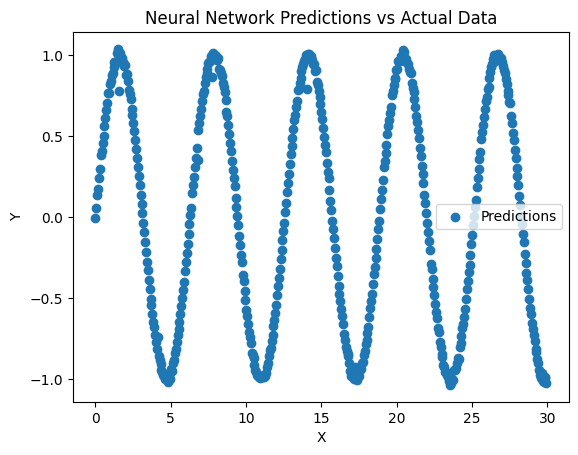

In [59]:
# Plotting predictions over actual data
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient computation
    predictions = model(x_tensor).numpy()

# plt.scatter(x, y, label='Actual Data', alpha=1)
plt.scatter(x, predictions, label='Predictions', alpha=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Neural Network Predictions vs Actual Data')
plt.legend()
plt.show()